# Linear Regression

This notebook implements the *ordinary least squares* Linear Regression algorithm, using batch Gradient Descent.

Dataset: [Boston Housing Dataset](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class LinearRegression:
    def __init__(self, learning_rate: float, debug_parameter_values: bool = False):
        self._learning_rate = learning_rate
        self._parameters = []

        self._dpv = debug_parameter_values

    def fit(self, X: np.ndarray, y: np.ndarray):
        # this implements BATCH gradient descent
        no_features = len(X[0])
        m = len(X)
        
        assert no_features >= 1

        self._parameters = [0.0] * (no_features + 1) # we allocate an extra paramater for the 'b' in y = mx + b
        # example: y = m1x + m2x + m3x + b: we have 3 features + 1 for the b

        converged = False

        while not converged:
            prev = None
            for j, param in enumerate(self._parameters):
                summation = 0
                for i in range(m):
                    x, y_ = X[i], y[i]

                    mul = 1 if j == 0 else x[j-1]
                    summation += ((self.predict(x) - y_) * mul)

                new_param = param - (self._learning_rate * summation)
                self._parameters[j] = new_param
                
                if self._dpv:
                    print(self._parameters)

                if prev is None:
                    prev = self._parameters.copy()
                elif prev == self._parameters:
                    # we have converged
                    converged = True
                    break

    def predict(self, x: np.ndarray):
        predict_y = self._parameters[0]
        for idx, val in enumerate(x, start=1):
            param = self._parameters[idx]
            predict_y += (param * val)

        return predict_y

In [5]:
df = pd.read_csv("datasets/HousingData.csv")
X = df[["NOX"]].to_numpy()
y = df["MEDV"].to_numpy()

In [9]:
model = LinearRegression(0.001)
model.fit(X, y)

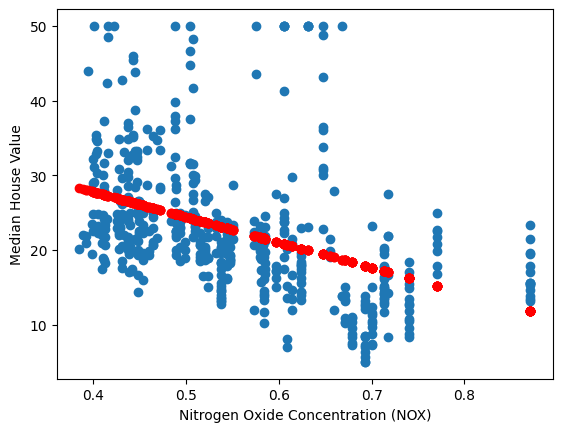

In [10]:
plt.scatter(X, y)
plt.xlabel("Nitrogen Oxide Concentration (NOX)")
plt.ylabel("Median House Value")

for x in X:
    y_pred = model.predict(np.array([x]))
    plt.plot(x, y_pred, 'ro')

plt.show()